In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import dask.dataframe as ddf
from pandas import Series, DataFrame
%matplotlib inline

In [2]:
import seaborn as sn
import plotly.express as px

### Upload aggregated overall suicide rates during 2009 to 2013

In [3]:
suicide_overall = pd.read_csv(r'Overall_Suicide_Aggregated/overall_2013_aggregated.txt', sep='\t',dtype={"County Code": str})
suicide_overall = suicide_overall.drop("Notes",1)
suicide_overall = suicide_overall.dropna(how = 'any')
suicide_overall['Deaths']=suicide_overall['Deaths'].astype(int)
suicide_overall['Population']=suicide_overall['Population'].astype(int)
suicide_overall['SuicideDeathRate'] = (suicide_overall['Deaths'] / suicide_overall['Population'])*100000
suicide_overall.head()

/global/homes/w/wenhuan/.conda/envs/myenv/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


,County,County Code,Deaths,Population,Crude Rate,SuicideDeathRate
0,"Autauga County, AL",01001,53,274733,19.3,19.291458
1,"Baldwin County, AL",01003,185,934718,19.8,19.792066
2,"Barbour County, AL",01005,16,136510,Unreliable,11.720753
3,"Bibb County, AL",01007,16,113731,Unreliable,14.068284
4,"Blount County, AL",01009,53,288038,18.4,18.400350


### Upload aggregated firearm suicide rates during 2009 to 2013

In [4]:
suicide_firearm = pd.read_csv(r'Firearm_Suicide_Aggregated/firearm_2013_aggregated.txt', sep='\t',dtype={"County Code": str})
suicide_firearm = suicide_firearm.drop("Notes",1)
suicide_firearm = suicide_firearm.dropna(how = 'any')
suicide_firearm['Deaths']=suicide_firearm['Deaths'].astype(int)
suicide_firearm['Population']=suicide_firearm['Population'].astype(int)
suicide_firearm['SuicideDeathRate'] = (suicide_firearm['Deaths'] / suicide_firearm['Population'])*100000
suicide_firearm.head()

/global/homes/w/wenhuan/.conda/envs/myenv/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


,County,County Code,Deaths,Population,Crude Rate,SuicideDeathRate
0,"Autauga County, AL",01001,39,274733,14.2,14.195601
1,"Baldwin County, AL",01003,130,934718,13.9,13.907938
2,"Bibb County, AL",01007,12,113731,Unreliable,10.551213
3,"Blount County, AL",01009,34,288038,11.8,11.803998
4,"Butler County, AL",01013,16,103036,Unreliable,15.528553


### Upload aggregated non-firearm suicide rates during 2009 to 2014

In [5]:
suicide_nonfirearm = pd.read_csv(r'Nonfirearm_Suicide_Aggregated/nonfirearm_2013_aggregated.txt', sep='\t',dtype={"County Code": str})
suicide_nonfirearm = suicide_nonfirearm.drop("Notes",1)
suicide_nonfirearm = suicide_nonfirearm.dropna(how = 'any')
suicide_nonfirearm['Deaths']=suicide_nonfirearm['Deaths'].astype(int)
suicide_nonfirearm['Population']=suicide_nonfirearm['Population'].astype(int)
suicide_nonfirearm['SuicideDeathRate'] = (suicide_nonfirearm['Deaths'] / suicide_nonfirearm['Population'])*100000
suicide_nonfirearm.head()

/global/homes/w/wenhuan/.conda/envs/myenv/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


,County,County Code,Deaths,Population,Crude Rate,SuicideDeathRate
0,"Autauga County, AL",01001,14,274733,Unreliable,5.095857
1,"Baldwin County, AL",01003,55,934718,5.9,5.884128
2,"Blount County, AL",01009,19,288038,Unreliable,6.596352
3,"Calhoun County, AL",01015,30,588764,5.1,5.095420
4,"Chilton County, AL",01021,12,218792,Unreliable,5.484661


In [6]:
amount = [suicide_overall.shape[0], suicide_firearm.shape[0], suicide_nonfirearm.shape[0]]
data = {'Suicide Type': ['overall', 'firearm', 'nonfirearm'],
       'County Amount': amount}
df_amount = pd.DataFrame(data)
df_amount

,Suicide Type,County Amount
0,overall,2276
1,firearm,1883
2,nonfirearm,1330


### make up the missing non-firearm death records as many as possible

In [7]:
FS = suicide_firearm[['County Code', 'Deaths']]
FS = FS.rename(columns = {'County Code': 'fips', 'Deaths': 'Deaths_FS'})
NFS = suicide_nonfirearm[['County Code', 'Deaths']]
NFS = NFS.rename(columns = {'County Code': 'fips', 'Deaths': 'Deaths_NFS'})
suicide = suicide_overall[['County', 'County Code', 'Deaths', 'Population']]
suicide = suicide.rename(columns = {'County Code': 'fips'})

In [8]:
FS.head()

,fips,Deaths_FS
0,01001,39
1,01003,130
2,01007,12
3,01009,34
4,01013,16


In [9]:
NFS.head()

,fips,Deaths_NFS
0,01001,14
1,01003,55
2,01009,19
3,01015,30
4,01021,12


In [10]:
suicide.head()

,County,fips,Deaths,Population
0,"Autauga County, AL",01001,53,274733
1,"Baldwin County, AL",01003,185,934718
2,"Barbour County, AL",01005,16,136510
3,"Bibb County, AL",01007,16,113731
4,"Blount County, AL",01009,53,288038


In [11]:
suicide = suicide.merge(FS, on = 'fips', how = 'left')
suicide = suicide.merge(NFS, on = 'fips', how = 'left')
suicide.head()

,County,fips,Deaths,Population,Deaths_FS,Deaths_NFS
0,"Autauga County, AL",01001,53,274733,39.0,14.0
1,"Baldwin County, AL",01003,185,934718,130.0,55.0
2,"Barbour County, AL",01005,16,136510,NaN,NaN
3,"Bibb County, AL",01007,16,113731,12.0,NaN
4,"Blount County, AL",01009,53,288038,34.0,19.0


In [12]:
suicide['Deaths_NFS'] = suicide['Deaths'] - suicide['Deaths_FS']
suicide.head()

,County,fips,Deaths,Population,Deaths_FS,Deaths_NFS
0,"Autauga County, AL",01001,53,274733,39.0,14.0
1,"Baldwin County, AL",01003,185,934718,130.0,55.0
2,"Barbour County, AL",01005,16,136510,NaN,NaN
3,"Bibb County, AL",01007,16,113731,12.0,4.0
4,"Blount County, AL",01009,53,288038,34.0,19.0


In [13]:
suicide['Deaths_FS'] = suicide['Deaths'] - suicide['Deaths_NFS']
suicide.head()

,County,fips,Deaths,Population,Deaths_FS,Deaths_NFS
0,"Autauga County, AL",01001,53,274733,39.0,14.0
1,"Baldwin County, AL",01003,185,934718,130.0,55.0
2,"Barbour County, AL",01005,16,136510,NaN,NaN
3,"Bibb County, AL",01007,16,113731,12.0,4.0
4,"Blount County, AL",01009,53,288038,34.0,19.0


In [14]:
suicide_overall = suicide[['County', 'fips', 'Deaths', 'Population']]
suicide_overall['SuicideDeathRate'] = (suicide_overall['Deaths'] / suicide_overall['Population'])*100000
suicide_overall.head()

/global/homes/w/wenhuan/.conda/envs/myenv/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,County,fips,Deaths,Population,SuicideDeathRate
0,"Autauga County, AL",01001,53,274733,19.291458
1,"Baldwin County, AL",01003,185,934718,19.792066
2,"Barbour County, AL",01005,16,136510,11.720753
3,"Bibb County, AL",01007,16,113731,14.068284
4,"Blount County, AL",01009,53,288038,18.400350


In [15]:
suicide_firearm = suicide[['County', 'fips', 'Deaths_FS', 'Population']]
suicide_firearm = suicide_firearm.rename(columns = {'Deaths_FS': 'Deaths'})
suicide_firearm['SuicideDeathRate'] = (suicide_firearm['Deaths'] / suicide_firearm['Population'])*100000
suicide_firearm.head()

,County,fips,Deaths,Population,SuicideDeathRate
0,"Autauga County, AL",01001,39.0,274733,14.195601
1,"Baldwin County, AL",01003,130.0,934718,13.907938
2,"Barbour County, AL",01005,NaN,136510,NaN
3,"Bibb County, AL",01007,12.0,113731,10.551213
4,"Blount County, AL",01009,34.0,288038,11.803998


In [16]:
suicide_nonfirearm = suicide[['County', 'fips', 'Deaths_NFS', 'Population']]
suicide_nonfirearm = suicide_nonfirearm.rename(columns = {'Deaths_NFS': 'Deaths'})
suicide_nonfirearm['SuicideDeathRate'] = (suicide_nonfirearm['Deaths'] / suicide_nonfirearm['Population'])*100000
suicide_nonfirearm.head()

,County,fips,Deaths,Population,SuicideDeathRate
0,"Autauga County, AL",01001,14.0,274733,5.095857
1,"Baldwin County, AL",01003,55.0,934718,5.884128
2,"Barbour County, AL",01005,NaN,136510,NaN
3,"Bibb County, AL",01007,4.0,113731,3.517071
4,"Blount County, AL",01009,19.0,288038,6.596352


In [17]:
suicide_overall = suicide_overall.dropna()
suicide_firearm = suicide_firearm.dropna()
suicide_nonfirearm = suicide_nonfirearm.dropna()

In [18]:
amount = [suicide_overall.shape[0], suicide_firearm.shape[0], suicide_nonfirearm.shape[0]]
data = {'Suicide Type': ['overall', 'firearm', 'nonfirearm'],
       'County Amount': amount}
df_amount = pd.DataFrame(data)
df_amount

,Suicide Type,County Amount
0,overall,2276
1,firearm,1883
2,nonfirearm,1883


In [19]:
suicide_overall['Suicide Type'] = 'Overall'
suicide_firearm['Suicide Type'] = 'Firearm'
suicide_nonfirearm['Suicide Type'] = 'Nonfirearm'

In [21]:
frames = [suicide_overall, suicide_firearm, suicide_nonfirearm]
suicide = pd.concat(frames)
suicide['year'] = '2013'
suicide.head()

,County,fips,Deaths,Population,SuicideDeathRate,Suicide Type,year
0,"Autauga County, AL",01001,53.0,274733,19.291458,Overall,2013
1,"Baldwin County, AL",01003,185.0,934718,19.792066,Overall,2013
2,"Barbour County, AL",01005,16.0,136510,11.720753,Overall,2013
3,"Bibb County, AL",01007,16.0,113731,14.068284,Overall,2013
4,"Blount County, AL",01009,53.0,288038,18.400350,Overall,2013


In [22]:
suicide.shape

(6042, 7)

In [23]:
suicide.to_csv('suicide_all_types_2013.csv')

## uploading environmental data

In [24]:
ur_files = ddf.read_csv('Climate_Factors/climate_factors_aggregated_2013.csv', dtype = {'fips': str})
climate = ur_files.compute()
climate = climate.loc[:, ~climate.columns.str.contains('^Unnamed')]
climate = climate.drop(['county'], axis = 1)
climate.head()

,fips,mean_temp,dewpoint,visibility,wind_speed,precipitation,fog,rain,snow,hail,thunder,Relative_Humidity,Heat_Index,PM2.5,Ozone
0,01001,65.278159,54.564609,9.406404,4.280175,0.149243,0.147269,0.481242,0.007143,0.0,0.163803,68.312956,64.716684,10.76,0.6
1,01003,68.262859,NaN,NaN,6.015582,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,NaN,NaN,9.42,3.8
2,01005,65.542883,54.170850,8.949306,3.005912,0.086412,0.125612,0.562833,0.040590,0.0,0.209544,66.779976,64.935831,10.56,0.2
3,01007,63.075495,52.428305,8.900633,3.206497,0.157286,0.086521,0.351591,0.010959,0.0,0.138552,68.231378,62.289919,10.58,2.0
4,01009,59.640882,NaN,NaN,3.987640,0.165313,0.000000,0.000000,0.000000,0.0,0.000000,NaN,NaN,11.34,4.4


## uploading social economic data

In [25]:
ur_files = ddf.read_csv('Social_Economic_Factors/Social_Economic_2013.csv', dtype = {'fips': str, 'per_capita_income': float})
social = ur_files.compute()
social = social.loc[:, ~social.columns.str.contains('^Unnamed')]
social = social.drop(['year'], axis = 1)
social.head()

,fips,per_capita_income,percent_below_poverty,percent_no_highschool_diploma,percent_mobile_homes,percent_no_vehicle,percent_unemployed_CDC,percent_overcrowding,percent_multi_unit_housing,percent_age_65_and_older,percent_limited_english_abilities,percent_minorities,percent_disabled,percent_institutionalized_in_group_quarters,percent_single_parent_households_CDC,percent_age_18_to_34,percent_age_35_to_44,percent_age_45_to_54,percent_age_55_to_64,rurality
0,01001,24571.0,12.133385,15.424697,19.886218,4.708286,20.360629,2.147377,3.298830,12.648660,3.310125,23.517949,28.289111,0.759466,26.416406,20.687708,14.560985,15.069117,10.821935,3.0
1,01003,26766.0,13.940723,11.238400,14.265596,3.049821,23.118885,1.891298,17.103050,17.292667,5.240858,16.607523,24.998481,1.333412,23.555660,19.156236,12.722725,14.430775,13.602937,4.0
2,01005,16829.0,26.656842,27.733305,24.969330,9.500000,33.466066,1.989130,1.340119,15.021412,4.418966,53.687640,37.434863,10.493759,50.824970,22.802972,13.432890,14.172248,13.015629,6.0
3,01007,17427.0,18.137825,23.487614,34.710320,4.442251,33.029660,0.423071,1.700414,13.580030,1.984719,25.138437,30.532091,5.634174,30.864198,22.035686,15.148985,15.206118,11.795728,2.0
4,01009,20730.0,15.811239,23.835144,20.835305,3.581580,25.853546,1.478113,0.702655,15.278621,6.530597,11.575239,30.875327,0.982247,21.513830,20.030196,13.355778,14.036062,13.006959,2.0


## uploading altitude data

In [26]:
ur_files = ddf.read_csv('county_altitude.csv', dtype = {'FIPSCODE': str})
altitude = ur_files.compute()
altitude = altitude.rename(columns = {'FIPSCODE': 'fips', 'elevation': 'altitude'})
altitude = altitude[['fips', 'altitude']]
altitude.head()

,fips,altitude
0,19107,207.03
1,19189,390.25
2,19029,385.95
3,19015,268.98
4,19059,425.89


In [27]:
social = social.merge(altitude, on = 'fips', how = 'left')
social.head()

,fips,per_capita_income,percent_below_poverty,percent_no_highschool_diploma,percent_mobile_homes,percent_no_vehicle,percent_unemployed_CDC,percent_overcrowding,percent_multi_unit_housing,percent_age_65_and_older,...,percent_minorities,percent_disabled,percent_institutionalized_in_group_quarters,percent_single_parent_households_CDC,percent_age_18_to_34,percent_age_35_to_44,percent_age_45_to_54,percent_age_55_to_64,rurality,altitude
0,01001,24571.0,12.133385,15.424697,19.886218,4.708286,20.360629,2.147377,3.298830,12.648660,...,23.517949,28.289111,0.759466,26.416406,20.687708,14.560985,15.069117,10.821935,3.0,128.66
1,01003,26766.0,13.940723,11.238400,14.265596,3.049821,23.118885,1.891298,17.103050,17.292667,...,16.607523,24.998481,1.333412,23.555660,19.156236,12.722725,14.430775,13.602937,4.0,30.30
2,01005,16829.0,26.656842,27.733305,24.969330,9.500000,33.466066,1.989130,1.340119,15.021412,...,53.687640,37.434863,10.493759,50.824970,22.802972,13.432890,14.172248,13.015629,6.0,122.81
3,01007,17427.0,18.137825,23.487614,34.710320,4.442251,33.029660,0.423071,1.700414,13.580030,...,25.138437,30.532091,5.634174,30.864198,22.035686,15.148985,15.206118,11.795728,2.0,74.90
4,01009,20730.0,15.811239,23.835144,20.835305,3.581580,25.853546,1.478113,0.702655,15.278621,...,11.575239,30.875327,0.982247,21.513830,20.030196,13.355778,14.036062,13.006959,2.0,184.46


In [28]:
climate.shape[0]

3142

In [29]:
social.shape[0]

3221

# Check SHAP value with overall suicide rates in 2382 counties

In [30]:
suicide_social = social.merge(suicide_overall[['fips', 'SuicideDeathRate']], on = 'fips', how = 'left')
suicide_social.head()

,fips,per_capita_income,percent_below_poverty,percent_no_highschool_diploma,percent_mobile_homes,percent_no_vehicle,percent_unemployed_CDC,percent_overcrowding,percent_multi_unit_housing,percent_age_65_and_older,...,percent_disabled,percent_institutionalized_in_group_quarters,percent_single_parent_households_CDC,percent_age_18_to_34,percent_age_35_to_44,percent_age_45_to_54,percent_age_55_to_64,rurality,altitude,SuicideDeathRate
0,01001,24571.0,12.133385,15.424697,19.886218,4.708286,20.360629,2.147377,3.298830,12.648660,...,28.289111,0.759466,26.416406,20.687708,14.560985,15.069117,10.821935,3.0,128.66,19.291458
1,01003,26766.0,13.940723,11.238400,14.265596,3.049821,23.118885,1.891298,17.103050,17.292667,...,24.998481,1.333412,23.555660,19.156236,12.722725,14.430775,13.602937,4.0,30.30,19.792066
2,01005,16829.0,26.656842,27.733305,24.969330,9.500000,33.466066,1.989130,1.340119,15.021412,...,37.434863,10.493759,50.824970,22.802972,13.432890,14.172248,13.015629,6.0,122.81,11.720753
3,01007,17427.0,18.137825,23.487614,34.710320,4.442251,33.029660,0.423071,1.700414,13.580030,...,30.532091,5.634174,30.864198,22.035686,15.148985,15.206118,11.795728,2.0,74.90,14.068284
4,01009,20730.0,15.811239,23.835144,20.835305,3.581580,25.853546,1.478113,0.702655,15.278621,...,30.875327,0.982247,21.513830,20.030196,13.355778,14.036062,13.006959,2.0,184.46,18.400350


In [31]:
suicide_climate = climate.merge(suicide_social[['fips', 'rurality', 'altitude', 'SuicideDeathRate']], on = 'fips', how = 'left')
suicide_climate.head()

,fips,mean_temp,dewpoint,visibility,wind_speed,precipitation,fog,rain,snow,hail,thunder,Relative_Humidity,Heat_Index,PM2.5,Ozone,rurality,altitude,SuicideDeathRate
0,01001,65.278159,54.564609,9.406404,4.280175,0.149243,0.147269,0.481242,0.007143,0.0,0.163803,68.312956,64.716684,10.76,0.6,3.0,128.66,19.291458
1,01003,68.262859,NaN,NaN,6.015582,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,NaN,NaN,9.42,3.8,4.0,30.30,19.792066
2,01005,65.542883,54.170850,8.949306,3.005912,0.086412,0.125612,0.562833,0.040590,0.0,0.209544,66.779976,64.935831,10.56,0.2,6.0,122.81,11.720753
3,01007,63.075495,52.428305,8.900633,3.206497,0.157286,0.086521,0.351591,0.010959,0.0,0.138552,68.231378,62.289919,10.58,2.0,2.0,74.90,14.068284
4,01009,59.640882,NaN,NaN,3.987640,0.165313,0.000000,0.000000,0.000000,0.0,0.000000,NaN,NaN,11.34,4.4,2.0,184.46,18.400350


### SHAP - Socioeconomic factors + altitude + rurality

In [32]:
import xgboost
import shap
import copy    

In [33]:
suicide_social = suicide_social.dropna()
suicide_social.shape[0]

2256

In [34]:
X = suicide_social.iloc[:, 1:-1]
y = suicide_social.iloc[:, -1].array

In [35]:
model = xgboost.XGBRegressor().fit(X, y)

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


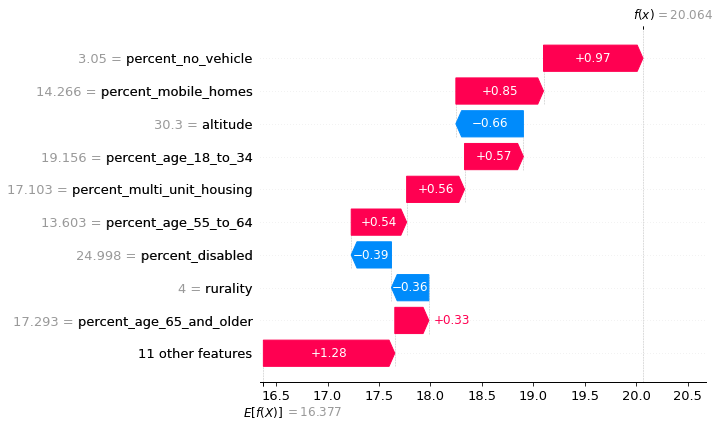

In [36]:
# explain the model's predictions using SHAP
# (same syntax works for LightGBM, CatBoost, scikit-learn, transformers, Spark, etc.)
explainer = shap.Explainer(model)
shap_values = explainer(X)

# visualize the first prediction's explanation
shap.plots.waterfall(shap_values[1])

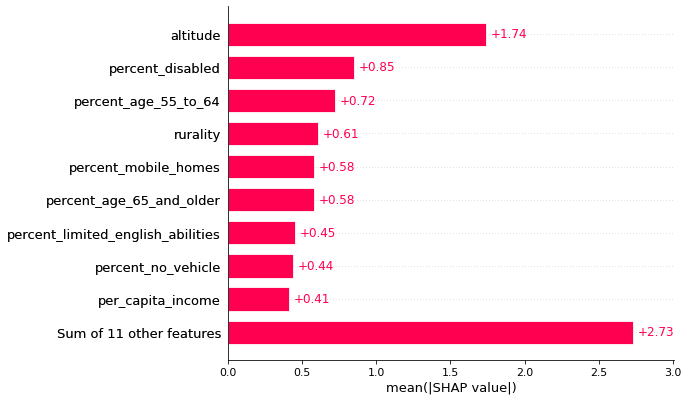

In [37]:
shap.plots.bar(shap_values)

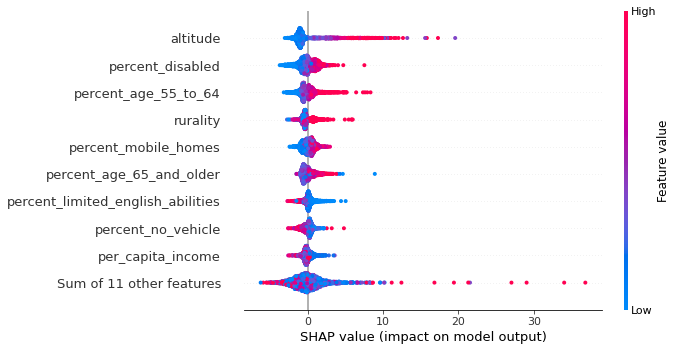

In [38]:
shap.plots.beeswarm(copy.deepcopy(shap_values))

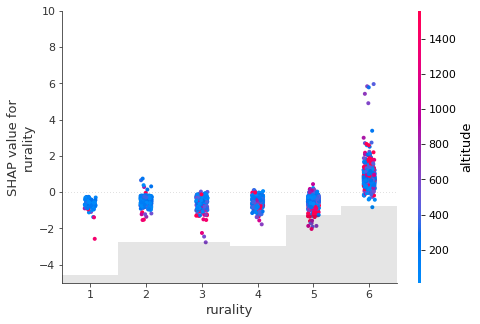

In [39]:
shap.plots.scatter(shap_values[:,"rurality"], color=shap_values[:,"altitude"], ymin = -5, ymax = 10)

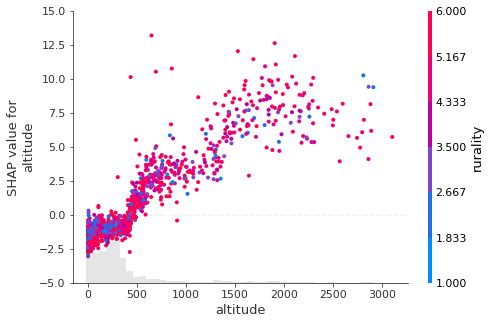

In [40]:
shap.plots.scatter(shap_values[:,"altitude"], color=shap_values[:,"rurality"], ymin = -5, ymax = 15)

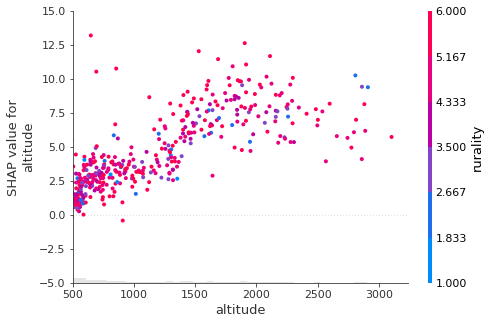

In [41]:
shap.plots.scatter(shap_values[:,"altitude"], color=shap_values[:,"rurality"], ymin = -5, ymax = 15, xmin = 500)

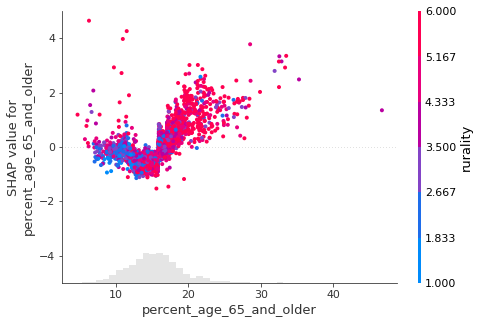

In [42]:
shap.plots.scatter(shap_values[:,"percent_age_65_and_older"], color=shap_values[:,"rurality"], ymin = -5, ymax = 5)

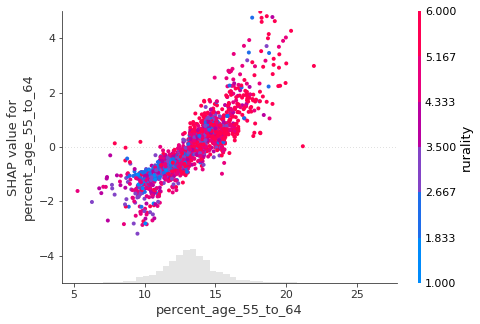

In [43]:
shap.plots.scatter(shap_values[:,"percent_age_55_to_64"], color=shap_values[:,"rurality"], ymin = -5, ymax = 5)

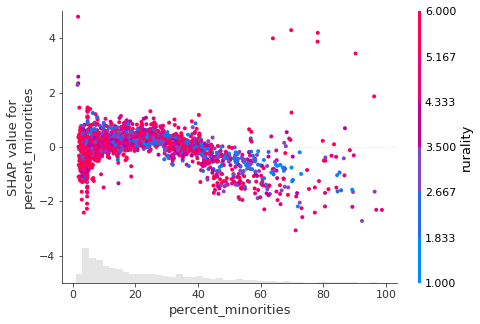

In [44]:
shap.plots.scatter(shap_values[:,"percent_minorities"], color=shap_values[:,"rurality"], ymin = -5, ymax = 5)

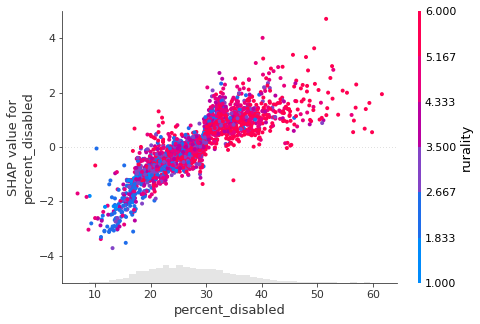

In [45]:
shap.plots.scatter(shap_values[:,"percent_disabled"], color=shap_values[:,"rurality"], ymin = -5, ymax = 5)

### SHAP - climate factors + altitude + rurality

In [46]:
suicide_climate = suicide_climate.dropna()
suicide_climate.shape[0]

2083

In [47]:
X = suicide_climate.iloc[:, 1:-1]
y = suicide_climate.iloc[:, -1].array

In [48]:
model = xgboost.XGBRegressor().fit(X, y)

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


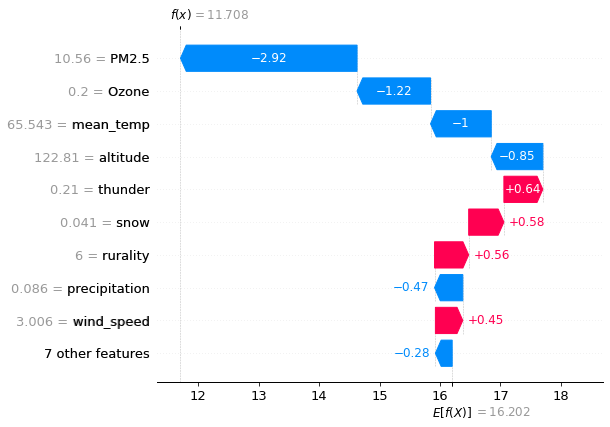

In [49]:
# explain the model's predictions using SHAP
# (same syntax works for LightGBM, CatBoost, scikit-learn, transformers, Spark, etc.)
explainer = shap.Explainer(model)
shap_values = explainer(X)

# visualize the first prediction's explanation
shap.plots.waterfall(shap_values[1])

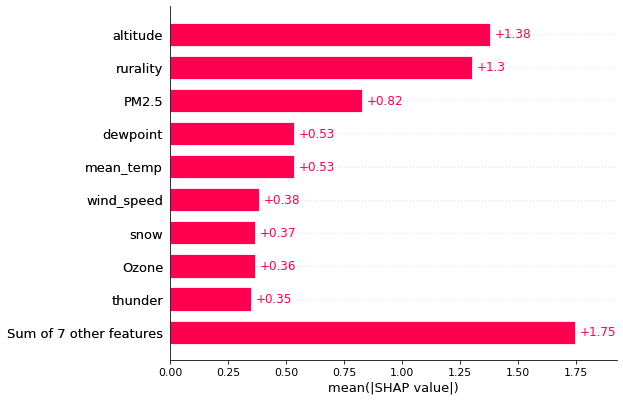

In [50]:
shap.plots.bar(shap_values)

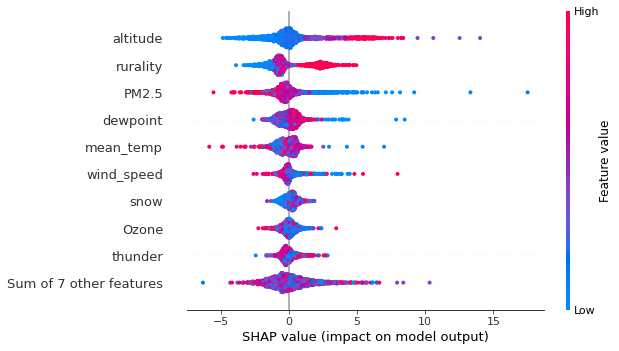

In [51]:
shap.plots.beeswarm(copy.deepcopy(shap_values))

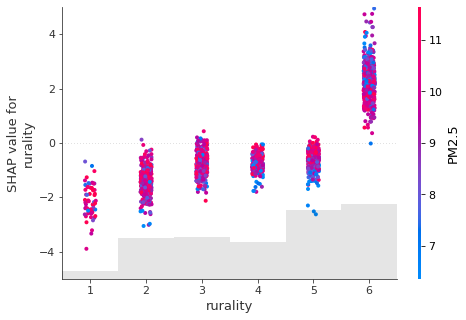

In [52]:
shap.plots.scatter(shap_values[:,"rurality"], color=shap_values[:,"PM2.5"], ymin = -5, ymax = 5)

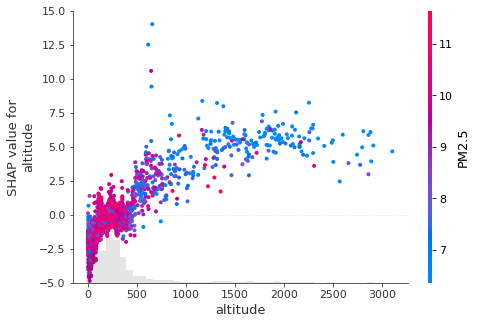

In [53]:
shap.plots.scatter(shap_values[:,"altitude"], color=shap_values[:,"PM2.5"], ymin = -5, ymax = 15)

# Check SHAP value with firearm suicide rates in 1948 counties

### socioeconomic factors + rurality + altitude

In [54]:
firearm_social = social.merge(suicide_firearm[['fips', 'SuicideDeathRate']], on = 'fips', how = 'left')
firearm_social.head()

,fips,per_capita_income,percent_below_poverty,percent_no_highschool_diploma,percent_mobile_homes,percent_no_vehicle,percent_unemployed_CDC,percent_overcrowding,percent_multi_unit_housing,percent_age_65_and_older,...,percent_disabled,percent_institutionalized_in_group_quarters,percent_single_parent_households_CDC,percent_age_18_to_34,percent_age_35_to_44,percent_age_45_to_54,percent_age_55_to_64,rurality,altitude,SuicideDeathRate
0,01001,24571.0,12.133385,15.424697,19.886218,4.708286,20.360629,2.147377,3.298830,12.648660,...,28.289111,0.759466,26.416406,20.687708,14.560985,15.069117,10.821935,3.0,128.66,14.195601
1,01003,26766.0,13.940723,11.238400,14.265596,3.049821,23.118885,1.891298,17.103050,17.292667,...,24.998481,1.333412,23.555660,19.156236,12.722725,14.430775,13.602937,4.0,30.30,13.907938
2,01005,16829.0,26.656842,27.733305,24.969330,9.500000,33.466066,1.989130,1.340119,15.021412,...,37.434863,10.493759,50.824970,22.802972,13.432890,14.172248,13.015629,6.0,122.81,NaN
3,01007,17427.0,18.137825,23.487614,34.710320,4.442251,33.029660,0.423071,1.700414,13.580030,...,30.532091,5.634174,30.864198,22.035686,15.148985,15.206118,11.795728,2.0,74.90,10.551213
4,01009,20730.0,15.811239,23.835144,20.835305,3.581580,25.853546,1.478113,0.702655,15.278621,...,30.875327,0.982247,21.513830,20.030196,13.355778,14.036062,13.006959,2.0,184.46,11.803998


In [55]:
firearm_social = firearm_social.dropna()
firearm_social.shape[0]

1865

In [56]:
X = firearm_social.iloc[:, 1:-1]
y = firearm_social.iloc[:, -1].array

In [57]:
model = xgboost.XGBRegressor().fit(X, y)

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


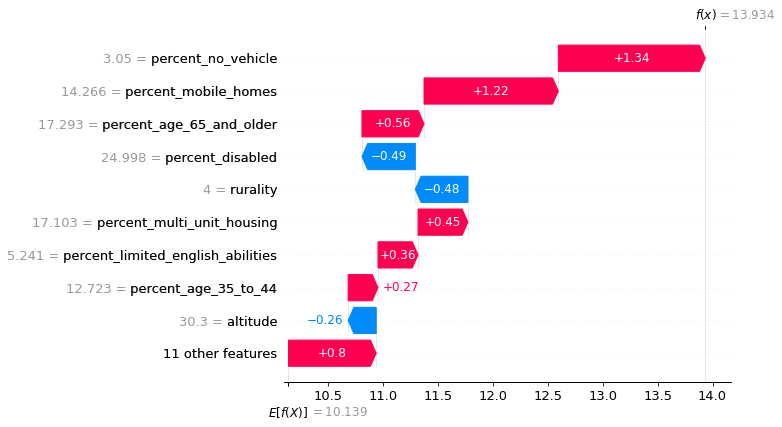

In [58]:
# explain the model's predictions using SHAP
# (same syntax works for LightGBM, CatBoost, scikit-learn, transformers, Spark, etc.)
explainer = shap.Explainer(model)
shap_values = explainer(X)

# visualize the first prediction's explanation
shap.plots.waterfall(shap_values[1])

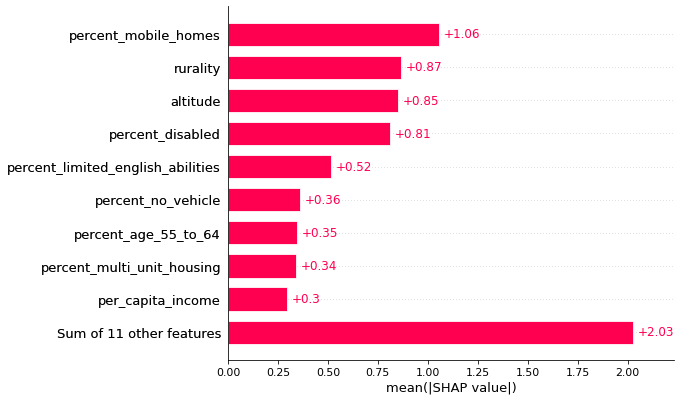

In [59]:
shap.plots.bar(shap_values)

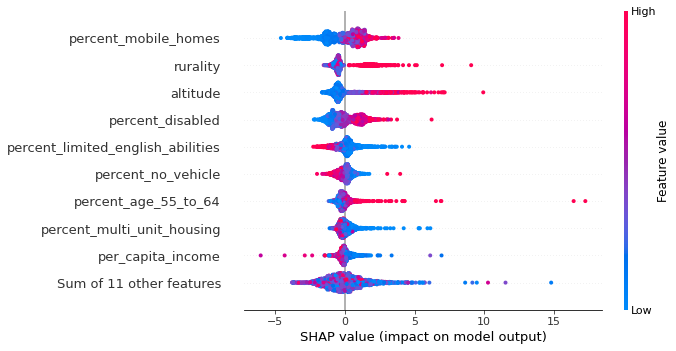

In [60]:
shap.plots.beeswarm(copy.deepcopy(shap_values))

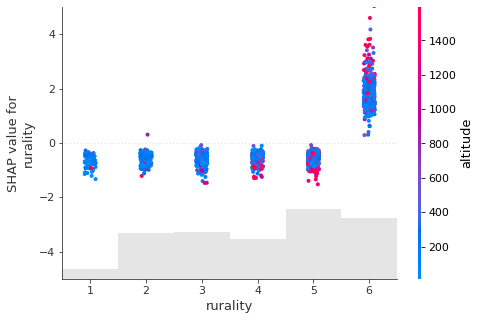

In [61]:
shap.plots.scatter(shap_values[:,"rurality"], color=shap_values[:,"altitude"], ymin = -5, ymax = 5)

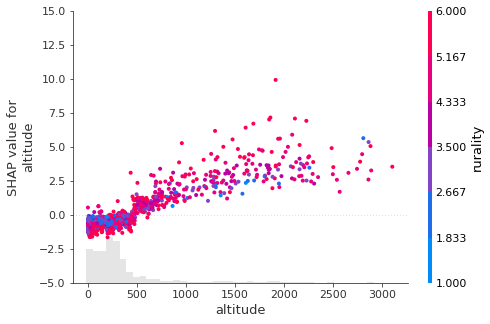

In [62]:
shap.plots.scatter(shap_values[:,"altitude"], color=shap_values[:,"rurality"], ymin = -5, ymax = 15)

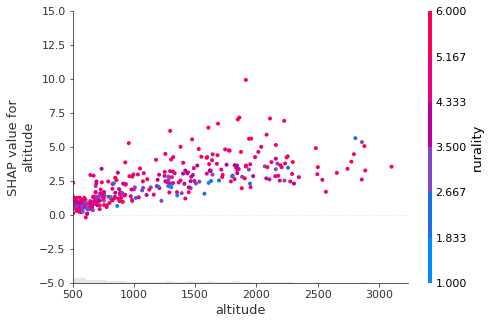

In [63]:
shap.plots.scatter(shap_values[:,"altitude"], color=shap_values[:,"rurality"], ymin = -5, ymax = 15, xmin = 500)

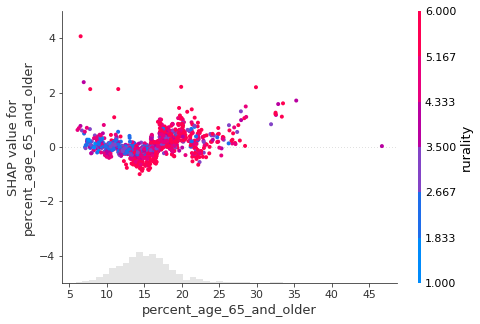

In [64]:
shap.plots.scatter(shap_values[:,"percent_age_65_and_older"], color=shap_values[:,"rurality"], ymin = -5, ymax = 5)

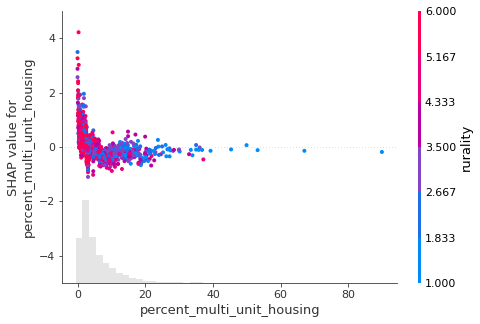

In [65]:
shap.plots.scatter(shap_values[:,"percent_multi_unit_housing"], color=shap_values[:,"rurality"], ymin = -5, ymax = 5)

### climate + rurality + altitude

In [66]:
firearm_climate = climate.merge(firearm_social[['fips', 'rurality', 'altitude', 'SuicideDeathRate']], on = 'fips', how = 'left')
firearm_climate.head()

,fips,mean_temp,dewpoint,visibility,wind_speed,precipitation,fog,rain,snow,hail,thunder,Relative_Humidity,Heat_Index,PM2.5,Ozone,rurality,altitude,SuicideDeathRate
0,01001,65.278159,54.564609,9.406404,4.280175,0.149243,0.147269,0.481242,0.007143,0.0,0.163803,68.312956,64.716684,10.76,0.6,3.0,128.66,14.195601
1,01003,68.262859,NaN,NaN,6.015582,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,NaN,NaN,9.42,3.8,4.0,30.30,13.907938
2,01005,65.542883,54.170850,8.949306,3.005912,0.086412,0.125612,0.562833,0.040590,0.0,0.209544,66.779976,64.935831,10.56,0.2,NaN,NaN,NaN
3,01007,63.075495,52.428305,8.900633,3.206497,0.157286,0.086521,0.351591,0.010959,0.0,0.138552,68.231378,62.289919,10.58,2.0,2.0,74.90,10.551213
4,01009,59.640882,NaN,NaN,3.987640,0.165313,0.000000,0.000000,0.000000,0.0,0.000000,NaN,NaN,11.34,4.4,2.0,184.46,11.803998


In [67]:
firearm_climate = firearm_climate.dropna()
firearm_climate.shape[0]

1721

In [68]:
X = firearm_climate.iloc[:, 1:-1]
y = firearm_climate.iloc[:, -1].array

In [69]:
model = xgboost.XGBRegressor().fit(X, y)

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


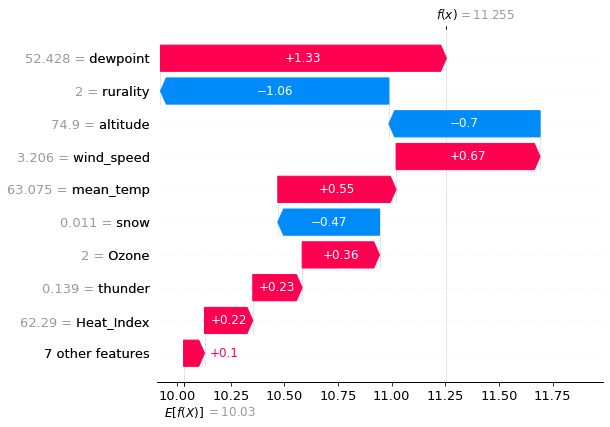

In [70]:
# explain the model's predictions using SHAP
# (same syntax works for LightGBM, CatBoost, scikit-learn, transformers, Spark, etc.)
explainer = shap.Explainer(model)
shap_values = explainer(X)

# visualize the first prediction's explanation
shap.plots.waterfall(shap_values[1])

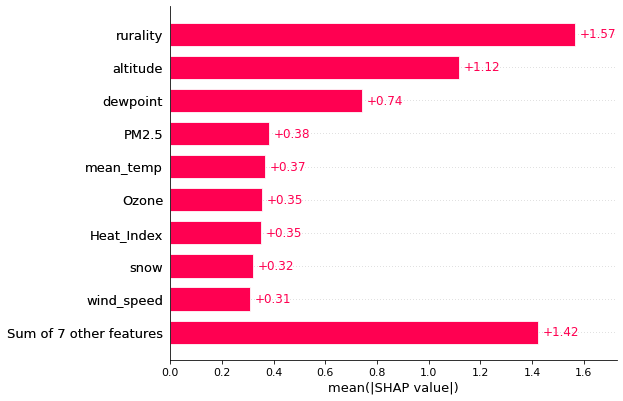

In [71]:
shap.plots.bar(shap_values)

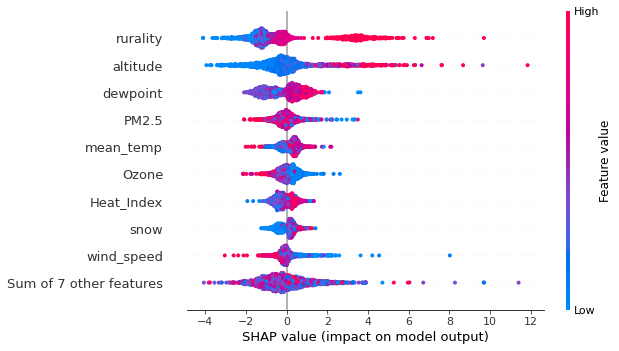

In [72]:
shap.plots.beeswarm(copy.deepcopy(shap_values))

# Check SHAP values with nonfirearm suicide rates in 1950 counties

### social economic factors + rurality + altitude

In [73]:
nonfirearm_social = social.merge(suicide_nonfirearm[['fips', 'SuicideDeathRate']], on = 'fips', how = 'left')
nonfirearm_social.head()

,fips,per_capita_income,percent_below_poverty,percent_no_highschool_diploma,percent_mobile_homes,percent_no_vehicle,percent_unemployed_CDC,percent_overcrowding,percent_multi_unit_housing,percent_age_65_and_older,...,percent_disabled,percent_institutionalized_in_group_quarters,percent_single_parent_households_CDC,percent_age_18_to_34,percent_age_35_to_44,percent_age_45_to_54,percent_age_55_to_64,rurality,altitude,SuicideDeathRate
0,01001,24571.0,12.133385,15.424697,19.886218,4.708286,20.360629,2.147377,3.298830,12.648660,...,28.289111,0.759466,26.416406,20.687708,14.560985,15.069117,10.821935,3.0,128.66,5.095857
1,01003,26766.0,13.940723,11.238400,14.265596,3.049821,23.118885,1.891298,17.103050,17.292667,...,24.998481,1.333412,23.555660,19.156236,12.722725,14.430775,13.602937,4.0,30.30,5.884128
2,01005,16829.0,26.656842,27.733305,24.969330,9.500000,33.466066,1.989130,1.340119,15.021412,...,37.434863,10.493759,50.824970,22.802972,13.432890,14.172248,13.015629,6.0,122.81,NaN
3,01007,17427.0,18.137825,23.487614,34.710320,4.442251,33.029660,0.423071,1.700414,13.580030,...,30.532091,5.634174,30.864198,22.035686,15.148985,15.206118,11.795728,2.0,74.90,3.517071
4,01009,20730.0,15.811239,23.835144,20.835305,3.581580,25.853546,1.478113,0.702655,15.278621,...,30.875327,0.982247,21.513830,20.030196,13.355778,14.036062,13.006959,2.0,184.46,6.596352


In [74]:
nonfirearm_social = nonfirearm_social.dropna()
nonfirearm_social.shape[0]

1865

In [75]:
X = nonfirearm_social.iloc[:, 1:-1]
y = nonfirearm_social.iloc[:, -1].array

In [76]:
model = xgboost.XGBRegressor().fit(X, y)

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


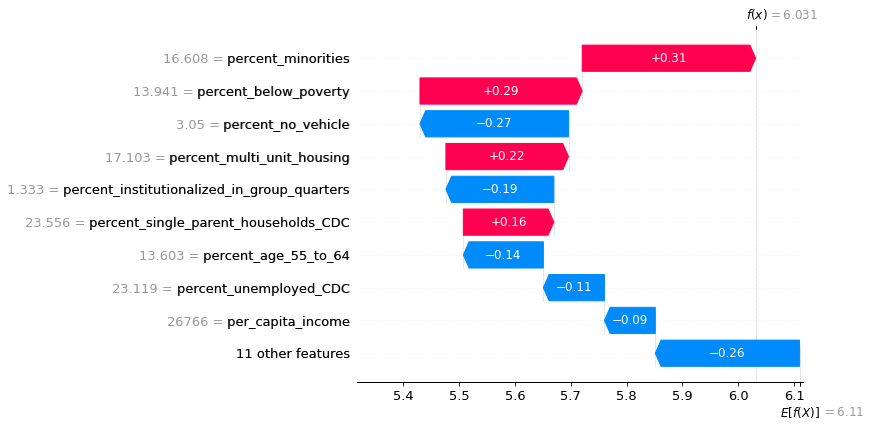

In [77]:
# explain the model's predictions using SHAP
# (same syntax works for LightGBM, CatBoost, scikit-learn, transformers, Spark, etc.)
explainer = shap.Explainer(model)
shap_values = explainer(X)

# visualize the first prediction's explanation
shap.plots.waterfall(shap_values[1])

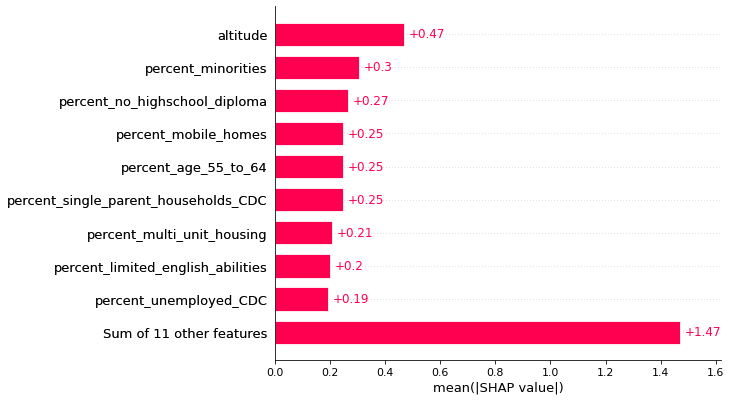

In [78]:
shap.plots.bar(shap_values)

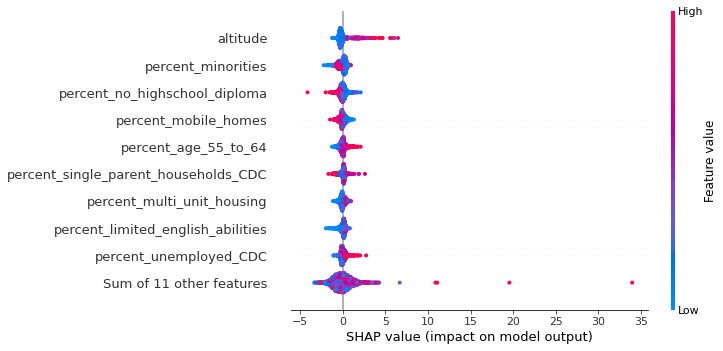

In [79]:
shap.plots.beeswarm(copy.deepcopy(shap_values))

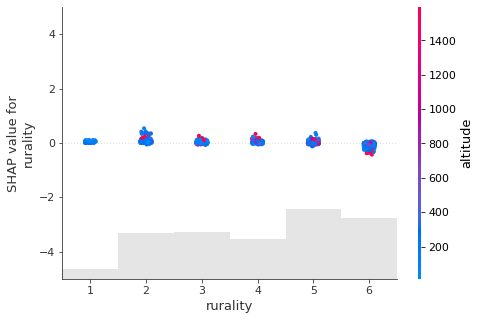

In [80]:
shap.plots.scatter(shap_values[:,"rurality"], color=shap_values[:,"altitude"], ymin = -5, ymax = 5)

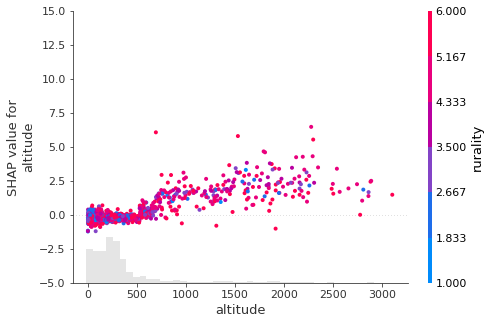

In [81]:
shap.plots.scatter(shap_values[:,"altitude"], color=shap_values[:,"rurality"], ymin = -5, ymax = 15)

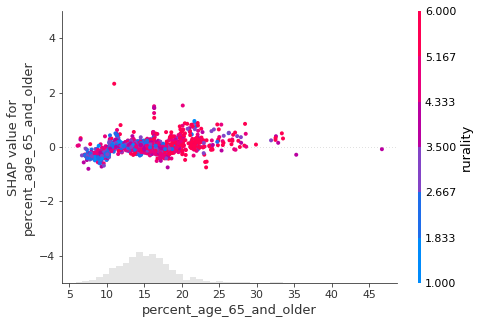

In [82]:
shap.plots.scatter(shap_values[:,"percent_age_65_and_older"], color=shap_values[:,"rurality"], ymin = -5, ymax = 5)

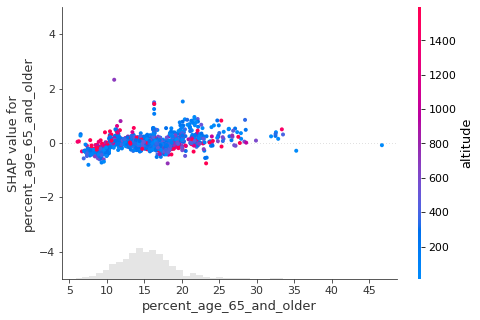

In [83]:
shap.plots.scatter(shap_values[:,"percent_age_65_and_older"], color=shap_values[:,"altitude"], ymin = -5, ymax = 5)

### climate + rurality + altitude

In [84]:
nonfirearm_climate = climate.merge(nonfirearm_social[['fips', 'rurality', 'altitude', 'SuicideDeathRate']], on = 'fips', how = 'left')
nonfirearm_climate.head()

,fips,mean_temp,dewpoint,visibility,wind_speed,precipitation,fog,rain,snow,hail,thunder,Relative_Humidity,Heat_Index,PM2.5,Ozone,rurality,altitude,SuicideDeathRate
0,01001,65.278159,54.564609,9.406404,4.280175,0.149243,0.147269,0.481242,0.007143,0.0,0.163803,68.312956,64.716684,10.76,0.6,3.0,128.66,5.095857
1,01003,68.262859,NaN,NaN,6.015582,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,NaN,NaN,9.42,3.8,4.0,30.30,5.884128
2,01005,65.542883,54.170850,8.949306,3.005912,0.086412,0.125612,0.562833,0.040590,0.0,0.209544,66.779976,64.935831,10.56,0.2,NaN,NaN,NaN
3,01007,63.075495,52.428305,8.900633,3.206497,0.157286,0.086521,0.351591,0.010959,0.0,0.138552,68.231378,62.289919,10.58,2.0,2.0,74.90,3.517071
4,01009,59.640882,NaN,NaN,3.987640,0.165313,0.000000,0.000000,0.000000,0.0,0.000000,NaN,NaN,11.34,4.4,2.0,184.46,6.596352


In [85]:
nonfirearm_climate = nonfirearm_climate.dropna()
nonfirearm_climate.shape[0]

1721

In [86]:
X = nonfirearm_climate.iloc[:, 1:-1]
y = nonfirearm_climate.iloc[:, -1].array

In [87]:
model = xgboost.XGBRegressor().fit(X, y)

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


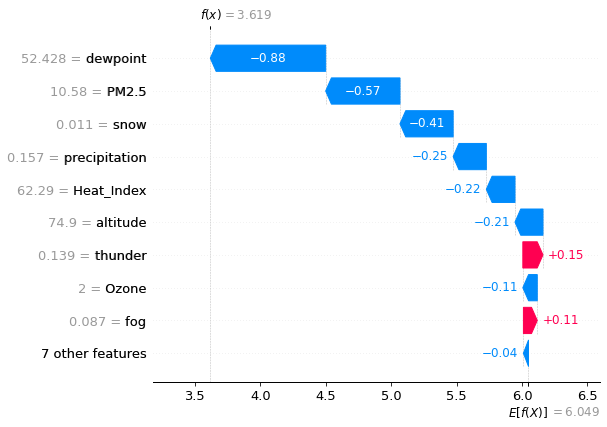

In [88]:
# explain the model's predictions using SHAP
# (same syntax works for LightGBM, CatBoost, scikit-learn, transformers, Spark, etc.)
explainer = shap.Explainer(model)
shap_values = explainer(X)

# visualize the first prediction's explanation
shap.plots.waterfall(shap_values[1])

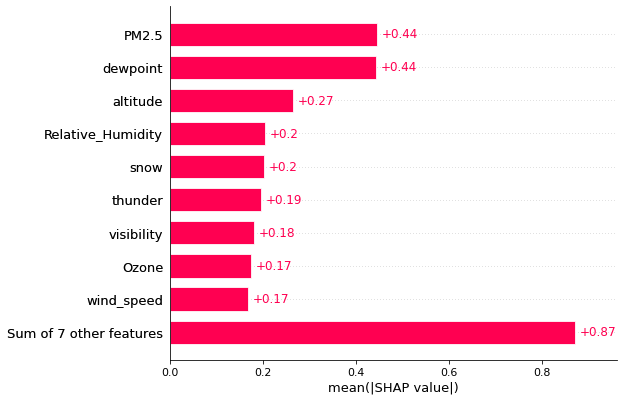

In [89]:
shap.plots.bar(shap_values)

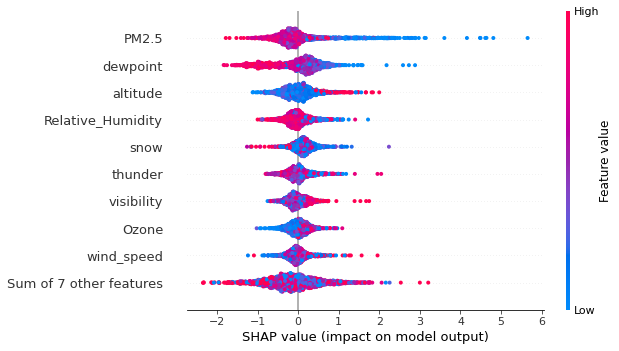

In [90]:
shap.plots.beeswarm(copy.deepcopy(shap_values))

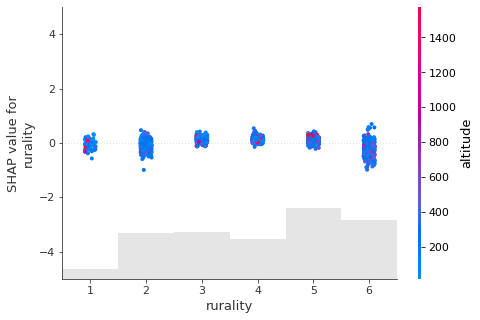

In [91]:
shap.plots.scatter(shap_values[:,"rurality"], color=shap_values[:,"altitude"], ymin = -5, ymax = 5)